# 量子状態

$$
|\psi\rangle = \begin{bmatrix}
    a_0 \\
    a_1 \\
\end{bmatrix}.
$$

規格化条件

$$
\sqrt{|a_0|^2+|a_1|^2}=1,
$$

$a_0, a_1\in \mathbb{C}$. L2ノルムが1、ともいう。


直交基底 $|0\rangle$ と$|1\rangle$。

$$
|0\rangle = \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}, \,\,\, |1\rangle = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}.
$$

重ね合わせ（superposition）
$$
|\psi\rangle = \begin{bmatrix}
    a_0 \\
    a_1 \\
\end{bmatrix}=a_0\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix} + 
a_1\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}=
a_0|0\rangle+a_1|1\rangle.
$$

In [1]:
!pip install qiskit==0.8.0
!pip install qiskit-aqua==0.4.0

In [0]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import circuit_drawer, plot_histogram, plot_bloch_multivector

import numpy as np
π = np.pi

 はじめは$|0\rangle$に設定されるので、測定すると$|0\rangle$が出る。

In [3]:
backend = BasicAer.get_backend('qasm_simulator')

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.measure(q, c)

100回実行してみます

In [4]:
job = execute(circuit, backend, shots=100)
result = job.result()
result.get_counts(circuit)

{'0': 100}

予想されたとおり、結果はすべて0です。

Bloch球の視覚化をしてみましょう。

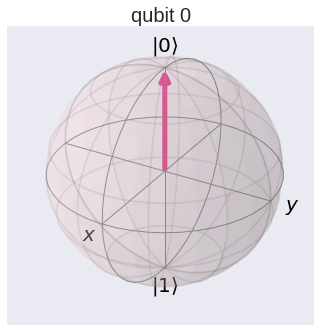

In [5]:
backend_statevector = \
BasicAer.get_backend('statevector_simulator')
circuit = QuantumCircuit(q, c)
circuit.iden(q[0]) # 単位行列なので変わらない
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result()\
                       .get_statevector(circuit))

状態 $|0\rangle$ を $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. にしてみましょう。
この状態にするゲートはいくつかありますが、ここでは Y軸回りで$\pi/2$回す、$\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -1\\1 & 1\end{bmatrix}$をかけます

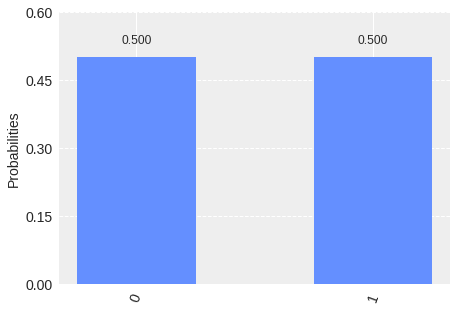

In [6]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0]) # Y軸回りの回転
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

ブロッホ球の状態を見てみると

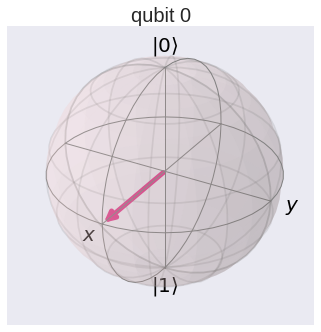

In [7]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0]) # Y軸回りの回転
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

と、ベクトルが実際に回っていることがわかります。

$|1\rangle$を回すとどうなるでしょう。 $|0\rangle$から$|1\rangle$ はNOT ゲート（Xゲート）で得られます。

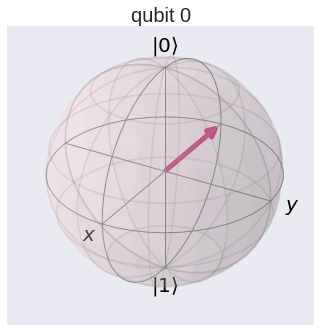

In [8]:
circuit = QuantumCircuit(q, c)
circuit.x(q[0]) # |1>にしている
circuit.ry(π/2, q[0]) # Y軸回りの回転
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

これは$\frac{1}{\sqrt{2}}(-|0\rangle + |1\rangle)$です。 -がついていますが、確率振幅の絶対値の二乗をみるので、測定のときには先ほどと違いはわかりません。

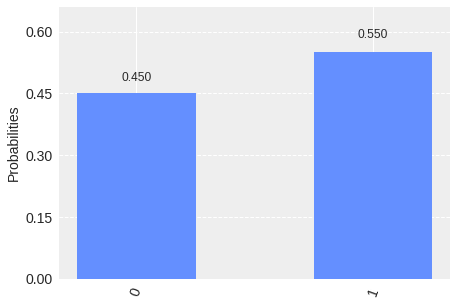

In [9]:
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

2回Ryゲートをかけると$|0\rangle$は$|1\rangle$になります。

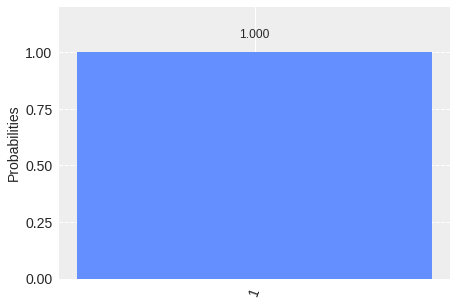

In [10]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
circuit.ry(π/2, q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

Many quantum algorithms exploit interference, for instance, the seminal [Deutsch-Josza algorithm](https://en.wikipedia.org/wiki/Deutsch–Jozsa_algorithm), which is among the simplest to understand its significance.

# 多量子ビットとエンタングルメント

$|\psi\rangle=\begin{bmatrix}a_0\\a_1\end{bmatrix}$ , $|\psi'\rangle=\begin{bmatrix}b_0\\b_1\end{bmatrix}$とするとこのテンソル積は$|\psi\rangle\otimes|\psi'\rangle=\begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix}$. 

2つの状態$|0\rangle$の量子ビット$q_0$, $q_1$ を用意する。

In [11]:
q0 = np.array([[1], [0]])
q1 = np.array([[1], [0]])
np.kron(q0, q1)

array([[1],
       [0],
       [0],
       [0]])

これは$|0\rangle\otimes|0\rangle$で、$|00\rangle$.とも書かれる。$|01\rangle$, $|10\rangle$, and $|11\rangle$ も同じように書かれる。

$|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle) \in\mathbb{C}^2\otimes\mathbb{C}^2$を見る。
$|\psi\rangle\otimes|\psi'\rangle$ for some $|\psi\rangle$, $|\psi'\rangle\in\mathbb{C}^2$.

これは

$$
|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle) = \begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix} = a_0b_0|00\rangle + a_0b_1|01\rangle + a_1b_0|10\rangle + a_1b_1|11\rangle.
$$

で$a_0b_0=1, a_0b_1=1, a_1b_0=0, a_1b_1=1$にしたもの。この状態はテンソル積で書けない。この状態をエンタングル状態という。

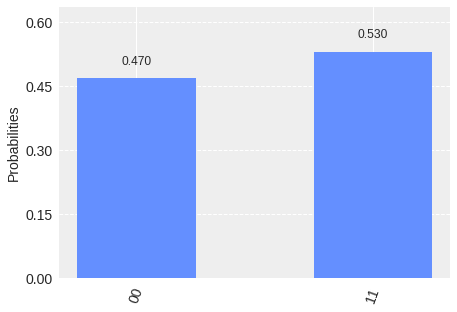

In [19]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0]) 
circuit.cx(q[0], q[1]) # コントロールX
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

/usr/local/lib/python3.6/dist-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)


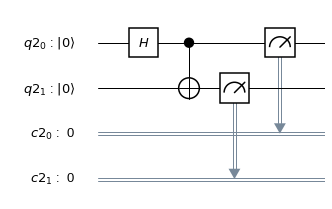

In [20]:
circuit_drawer(circuit) 

密度行列を見てみる

In [13]:
zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])
Π_0 = zero_ket.dot(zero_ket.T.conj())
Π_1 = one_ket.dot(one_ket.T.conj())
print(Π_0)
print(Π_1)

[[1 0]
 [0 0]]
[[0 0]
 [0 1]]


確率振幅を見てみる

In [14]:
ψ = np.array([[1], [1]])/np.sqrt(2)
print( ψ.T.conj().dot(Π_0.dot(ψ)) )
print( ψ.T.conj().dot(Π_1.dot(ψ)) )

[[0.5]]
[[0.5]]


In [15]:
probability_0 = ψ.T.conj().dot(Π_0.dot(ψ))
print( Π_0.dot(ψ)/np.sqrt(probability_0) )
probability_1 = ψ.T.conj().dot(Π_1.dot(ψ))
print( Π_1.dot(ψ)/np.sqrt(probability_1) )

[[1.]
 [0.]]
[[0.]
 [1.]]


In [16]:
zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])
ψ = (zero_ket + one_ket)/np.sqrt(2)
print("重ね合わせ状態の密度行列")
print(ψ.dot(ψ.T.conj()))
print("混合状態の密度行列")
print((zero_ket.dot(zero_ket.T.conj())+one_ket.dot(one_ket.T.conj()))/2)

重ね合わせ状態の密度行列
[[0.5 0.5]
 [0.5 0.5]]
混合状態の密度行列
[[0.5 0. ]
 [0.  0.5]]


この非対角成分はコヒーレンスを表しています。重ね合わせ状態だとコヒーレンスがあります。

コンパイラーが何をしているか見てみましょう

In [17]:
from qiskit import compile
compiled_circuit = compile(circuit, backend)
compiled_circuit.as_dict()['experiments'][0]['instructions']

[{'memory': [],
  'name': 'u2',
  'params': [0.0, 3.141592653589793],
  'qubits': [0],
  'texparams': ['0', '\\pi']},
 {'memory': [], 'name': 'cx', 'params': [], 'qubits': [0, 1], 'texparams': []},
 {'memory': [0],
  'name': 'measure',
  'params': [],
  'qubits': [0],
  'texparams': []},
 {'memory': [1],
  'name': 'measure',
  'params': [],
  'qubits': [1],
  'texparams': []}]

この場合、コンパイラが唯一行ったのは、アダマールゲートをパラメータ化されたユニタリ変換に置き換えることでした。

# Further reading

Chapter 9 in Quantum Computing since Democritus by Scott Aaronson describes a similar approach to understanding quantum states -- in fact, the interference example was lifted from there.